In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import fashion_mnist
from PIL import Image 
from sklearn.model_selection import train_test_split

In [2]:
(x_train,y_train),(x_test, y_test) = fashion_mnist.load_data() 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
x_train = x_train / 255
x_test =x_test/255

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:

x_train_d, x_val, y_train_d, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# Now, the number of samples in x_train_d and y_train_d should match
print(x_train_d.shape)  # Should match y_train_d shape
print(y_train_d.shape)  # Should match x_train_d shape


(54000, 28, 28, 1)
(54000,)


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train_d, y_train_d, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4967 - accuracy: 0.8186 - val_loss: 0.3649 - val_accuracy: 0.8633
Epoch 2/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3368 - accuracy: 0.8787 - val_loss: 0.3390 - val_accuracy: 0.8770
Epoch 3/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2891 - accuracy: 0.8947 - val_loss: 0.2814 - val_accuracy: 0.8988
Epoch 4/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2575 - accuracy: 0.9054 - val_loss: 0.2704 - val_accuracy: 0.8975
Epoch 5/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2323 - accuracy: 0.9149 - val_loss: 0.2607 - val_accuracy: 0.9025


In [10]:
test_accuracy,test_val= model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.8975


In [11]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


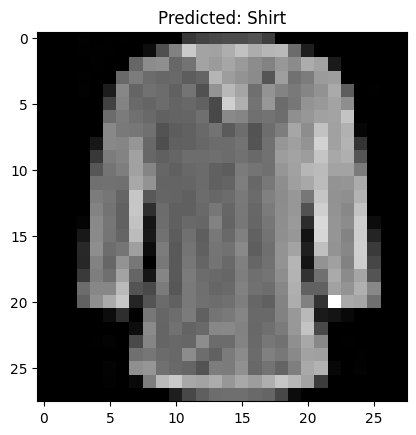

In [12]:
idx = 4
plt.imshow(x_test[idx].reshape(28,28),cmap="gray")
plt.title(f"Predicted: {class_names[np.argmax(prediction[idx])]}")
plt.show()